<a href="https://colab.research.google.com/github/swapnilkhartode/LGMVIP-Data-Science/blob/README/More%20Advanced%20Level%20Task/Task%20%3A1_ML_Facial_recognition_to_detect_mood_and_suggest_songs_accordingly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **LetsGrowMore Virtual Internship Program (November-2021)**

**More Advanced Level Task**

Name :- Swapnil Ramesh Khartode

Task 1 :- ML Facial recognition to detect mood and suggest songs accordingly

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Getting all images and labels from directory**

In [ ]:
Datadirectory = '/content/drive/My Drive/FacialMood/train'
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

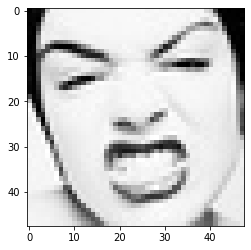

In [ ]:
for category in classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

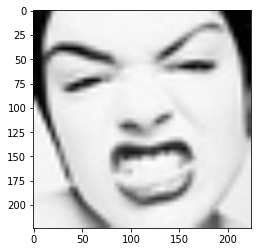

In [ ]:
img_size = 224  # Imagenet --> 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

 **Reading all images**

 **Converting into images (as X) and labels (as y)**

In [ ]:
X = np.load('/content/drive/My Drive/X.npy')
X[:1]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [248, 248, 248],
         [249, 249, 249],
         [249, 249, 249]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [248, 248, 248],
         [249, 249, 249],
         [249, 249, 249]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [248, 248, 248],
         [249, 249, 249],
         [249, 249, 249]],

        ...,

        [[ 75,  75,  75],
         [ 75,  75,  75],
         [ 74,  74,  74],
         ...,
         [154, 154, 154],
         [154, 154, 154],
         [154, 154, 154]],

        [[ 75,  75,  75],
         [ 75,  75,  75],
         [ 75,  75,  75],
         ...,
         [155, 155, 155],
         [155, 155, 155],
         [155, 155, 155]],

        [[ 75,  75,  75],
         [ 75,  75,  75],
         [ 75,  75,  75],
         ...,
         [155, 155, 155],
        

In [ ]:
y = np.load('/content/drive/My Drive/y.npy')
y

array([6, 3, 4, ..., 5, 3, 3], dtype=int32)

In [ ]:
X.shape

(16610, 224, 224, 3)

In [ ]:
#X = X/255.0

In [ ]:
y[1005]

4

In [ ]:
y.shape

(16610,)

 **Modelling**

In [ ]:
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7faa30288c50>>

In [ ]:
# Transfer learning
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = new_model.fit(X,y, epochs = 25)

Epoch 1/25
520/520 [==============================] - 209s 334ms/step - loss: 1.2996 - accuracy: 0.5175
Epoch 2/25
520/520 [==============================] - 174s 334ms/step - loss: 1.1209 - accuracy: 0.5863
Epoch 3/25
520/520 [==============================] - 174s 334ms/step - loss: 1.0287 - accuracy: 0.6154
Epoch 4/25
520/520 [==============================] - 174s 335ms/step - loss: 0.9621 - accuracy: 0.6454
Epoch 5/25
520/520 [==============================] - 174s 335ms/step - loss: 0.9271 - accuracy: 0.6615
Epoch 6/25
520/520 [==============================] - 174s 334ms/step - loss: 0.8447 - accuracy: 0.6931
Epoch 7/25
520/520 [==============================] - 174s 335ms/step - loss: 0.8008 - accuracy: 0.7072
Epoch 8/25
520/520 [==============================] - 174s 334ms/step - loss: 0.7442 - accuracy: 0.7265
Epoch 9/25
520/520 [==============================] - 174s 334ms/step - loss: 0.6904 - accuracy: 0.7474
Epoch 10/25
520/520 [==============================] - 174s 335m

 **Model evaluation**

 **Loss and Accuracy curve**

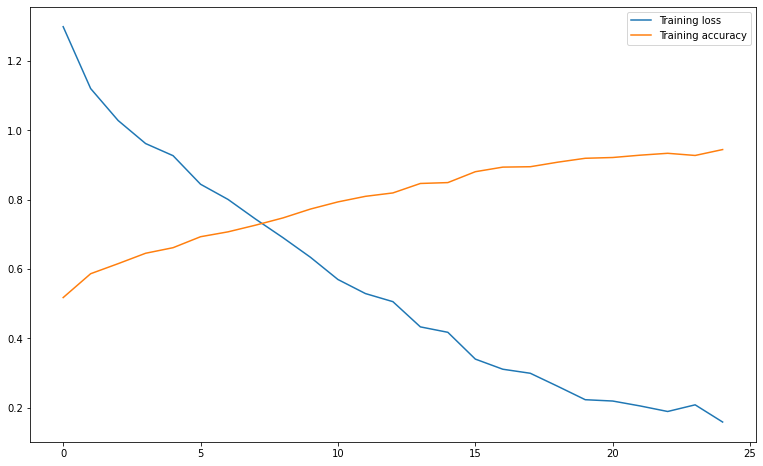

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.legend()
plt.show() 

**Final accuracy of 94.48% is achieved**

In [ ]:
new_model.save('model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


**Testing model for emotion recognition**

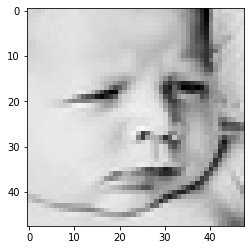

In [ ]:
test_img_path = '/content/drive/My Drive/FacialMood/test/angry/PrivateTest_88305.jpg'
test_img = cv2.imread(test_img_path)
plt.imshow(test_img)

In [ ]:
frame = cv2.imread(test_img_path)
final_img = cv2.resize(frame, (224,224))
final_img = np.expand_dims(final_img, axis = 0)

In [ ]:
final_img.shape

(1, 224, 224, 3)

In [ ]:
prediction = new_model.predict(final_img)
prediction[0]

array([9.9995363e-01, 1.7614460e-07, 1.0992803e-05, 1.5328744e-07,
       1.8145945e-05, 7.1428735e-06, 9.7714046e-06], dtype=float32)

In [ ]:
prediction.argmax()

0

#### 0 = angry <br>1 = disgust <br>2 = fear <br>3 = happy <br>4 = neutral <br>5 = sad <br>6 = surprise <br>

**Song Recommendation system**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from tqdm import tqdm

In [ ]:
#Load the dataset
df = pd.read_csv('/content/drive/My Drive/data.csv')

#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)
    
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)
    
#perform Kmeans CLustering
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')

#Song Recommender
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,8,14,16]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]


#Instantiate recommender class
recommender = Song_Recommender(df)

#Get recommendations 'Red Roses (feat. Landon Cube)' song
recommender.get_recommendations('Red Roses (feat. Landon Cube)', 5)

100%|██████████| 170652/170652 [00:16<00:00, 10222.35it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,name
38257,"Post Malone, Halsey, Future",Die For Me (feat. Future & Halsey)
38093,Bazzi,3:15
107211,The Weeknd,Initiation
91059,"Baby Bash, Z-Ro, Berner, Baby E",Light Up Light Up
56598,Post Malone,Hit This Hard


In [ ]:
# angry = 'Blank Space'
# disgust = "You're so vain"
# fear = 'Demons'
# happy = 'On Top of the World'
# neutral = 'Blinding lights'
# sad = 'Chandelier'
# surprise = 'Lovely'

**Getting songs by emotion**

In [ ]:
def get_song_by_emotion(prediction):
  if prediction.argmax() == 0:
    print('Emotion: Angry')
    print('Try these songs...')
    return 'Blank Space'
  if prediction.argmax() == 1:
    print('Emotion: Disgust')
    print('Try these songs...')
    return "You're so vain"
  if prediction.argmax() == 2:
    print('Emotion: Fear')
    print('Try these songs...')
    return 'Demons'
  if prediction.argmax() == 3:
    print('Emotion: Happy')
    print('Try these songs...')
    return 'On Top of the World'
  if prediction.argmax() == 4:
    print('Emotion: Neutral')
    print('Try these songs...')
    return 'Blinding lights'
  if prediction.argmax() == 5:
    print('Emotion: Sad')
    print('Try these songs...')
    return 'Chandelier'
  if prediction.argmax() == 6:
    print('Emotion: Surprise')
    print('Try these songs...')
    return 'Lovely'

**Importing image**

In [ ]:
from google.colab import files
files.upload()

Saving elonmusk.jpg to elonmusk.jpg


{'elonmusk.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
path = '/content/elonmusk.jpg'
frame = cv2.imread(path)

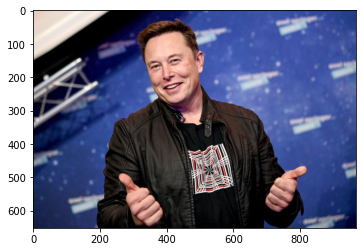

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread('/content/elonmusk.jpg'), cv2.COLOR_BGR2RGB))

**Preparing image for feeding into our model**

In [ ]:
!wget --no-check-certificate \
https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
-O haarcascade_frontalface_default.xml

--2021-10-10 10:07:09--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2021-10-10 10:07:09 (19.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
frame = cv2.imread('/content/elonmusk.jpg')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = facecascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_grey = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
  facess = facecascade.detectMultiScale(roi_grey)
  if len(facess) == 0:
    print('Face not detected')
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey:ey+eh, ex:ex+ew]
    final_img = cv2.resize(face_roi, (224,224))
final_img = np.expand_dims(final_img, axis = 0)

Text(0.5, 1.0, 'Only Face')

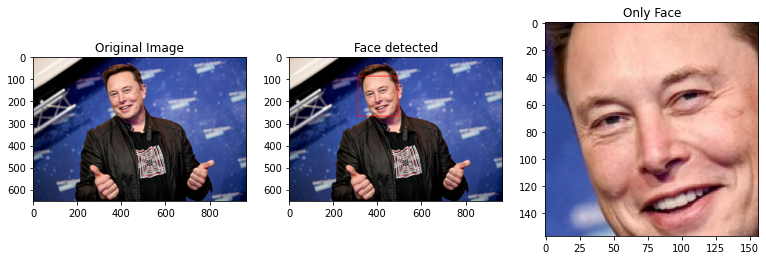

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (13,8))
ax1.imshow(cv2.cvtColor(cv2.imread('/content/elonmusk.jpg'), cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax2.set_title('Face detected')
ax3.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
ax3.set_title('Only Face')

**Getting emotion and song recommendations**

In [ ]:
prediction = new_model.predict(final_img)

In [ ]:
cols = ['artists','name']
#prediction = get_emotion(frame)
song = get_song_by_emotion(prediction[0])
rec = recommender.get_recommendations(song,10)
rec.reset_index(inplace=True)
rec.drop(['index'],axis=1,inplace=True)
rec.loc[0] = df[df['name'].str.lower() == song.lower()][cols].values[0]
# neutral_rec.loc[len(neutral_rec)] = df[df['name'].str.lower() == neutral_song.lower()][cols].values[0]
rec

Emotion: Happy
Try these songs...


100%|██████████| 170649/170649 [00:18<00:00, 9284.37it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,name
0,Imagine Dragons,On Top Of The World
1,TWICE,Dance The Night Away
2,Three Days Grace,Break
3,Bad Suns,Cardiac Arrest
4,Kelly Clarkson,Stronger (What Doesn't Kill You)
5,"NOTD, HRVY",I Miss Myself (with HRVY)
6,Tina Turner,The Best
7,David Guetta,Bang My Head (feat. Sia & Fetty Wap)
8,MKTO,Classic
9,"Starley, Ryan Riback",Call on Me - Ryan Riback Remix


In [ ]:
from google.colab import files
files.upload()

Saving WhatsApp Image 2021-10-10 at 4.32.24 PM.jpeg to WhatsApp Image 2021-10-10 at 4.32.24 PM.jpeg


{'WhatsApp Image 2021-10-10 at 4.32.24 PM.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x05\x00\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1a\x00\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf5\x01cD\\\x92\x00&\x8e^~\xde+\x10\xd0&\x84*\x1a\x10\xdae{>\'\xae\xba\x08\x86\x00\x00\t\x82h\x18\x98\x00\t\xa0\x00\x1a\x06&&!\xb4\x0c@\xc4\x0c\x10\xdc\xb1\x88\x18\x81\x83\x014\x00\xa15\x00\n\r\x0c@\xc1\x0c\x00\x01\x00b\x06 \x15\x80\x80\xa1l\xcb

In [ ]:
path = '/content/img077 - Copy (1).jpg'
frame = cv2.imread(path)

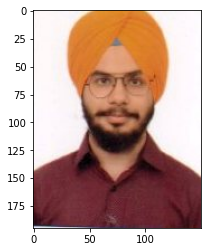

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

In [ ]:
frame = cv2.imread(path)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = facecascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_grey = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
  facess = facecascade.detectMultiScale(roi_grey)
  if len(facess) == 0:
    print('Face not detected')
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey:ey+eh, ex:ex+ew]
    final_img = cv2.resize(face_roi, (224,224))
final_img = np.expand_dims(final_img, axis = 0)

Text(0.5, 1.0, 'Only Face')

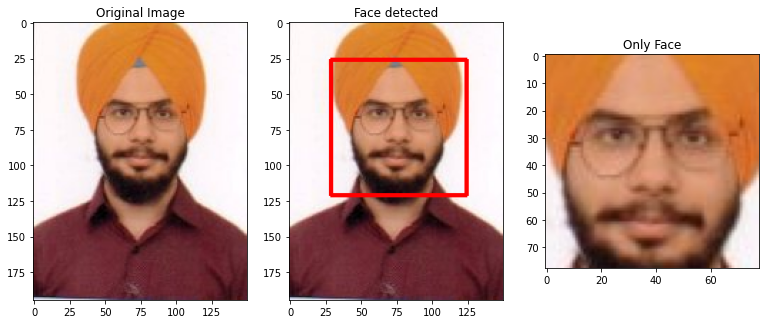

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (13,8))
ax1.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax2.set_title('Face detected')
ax3.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
ax3.set_title('Only Face')

In [ ]:
cols = ['artists','name']
prediction = new_model.predict(final_img)
#prediction = get_emotion(frame)
song = get_song_by_emotion(prediction[0])
rec = recommender.get_recommendations(song,10)
rec.reset_index(inplace=True)
rec.drop(['index'],axis=1,inplace=True)
rec.loc[0] = df[df['name'].str.lower() == song.lower()][cols].values[0]
# neutral_rec.loc[len(neutral_rec)] = df[df['name'].str.lower() == neutral_song.lower()][cols].values[0]
rec

Emotion: Neutral
Try these songs...


100%|██████████| 170652/170652 [00:19<00:00, 8550.23it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,name
0,The Weeknd,Blinding Lights
1,"""Why Dont We""",Hooked
2,Simple Plan,I'm Just a Kid
3,Zach Williams,Chain Breaker
4,NF,No Excuses
5,One Direction,Love You Goodbye
6,"Kygo, Sasha Sloan",I'll Wait
7,Mitchell Tenpenny,Drunk Me
8,Breaking Benjamin,Failure
9,Sabaton,To Hell and Back


**Conclusion**

**94% accuracy was achieved on mood detection using deep neural networks.**
**The recommendation system suggested songs perfectly depending on the mood.**